In [6]:
import pandas as pd
import numpy as np

data=pd.read_csv('avocado.csv')
data.head()
data['region'].unique()
#data['type'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#범주형 변수1개
#수치형 변수2개
#type:범주형
data=data[['AveragePrice', 'type','region']]
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
#'region'이 Orlando, Boston, Chicago인 데이터만 뽑아옴
data=data[(data['region']=='Orlando')|(data['region']=='Boston')|(data['region']=='Chicago')].reset_index(drop=True)
data

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


H0: 아보카도의 type과 region의 교호작용이 없다.\
H1: 아보카도의 type과 region의 교호작용이 있다.\
\
H0: type에 따른 아보카도 평균 가격차이는 없다.\
H1: type에 따른 아보카도 평균 가격차이가 있다.\
\
H0: region에 따른 아보카도 평균 가격차이는 없다.\
H1: region에 따른 아보카도 평균 가격차이는 있다.

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='AveragePrice ~ C(type)+C(region)+C(type):C(region)'
model=ols(formula, data).fit()

In [12]:
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


교호작용을 확인했을 때 p-value는 0.05보다 작으므로 귀무가설을 기각하여 아보카도의 type과 region 사이에 교호작용이 있다고 판단할 수 있다.

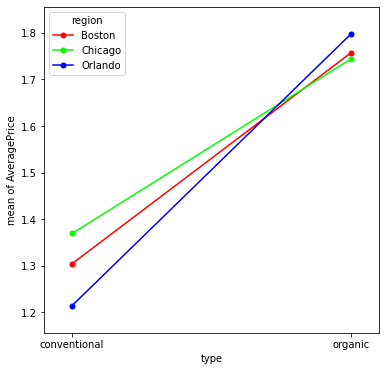

In [15]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
#변수값 각각저장
price=data['AveragePrice']
type=data['type']
region=data['region']
fig, ax=plt.subplots(figsize=(6,6))
fig=interaction_plot(type, region, price, ms=10, ax=ax)

통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다. 특히 Orlando에서는 다른 지역보다 conventional 대비 organic의 선호도가 높음을 알 수 있다.